# Introduction to Quantitative Finance

# 量化金融导论

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

版权所有 (c) 2019 Python Charmers Pty Ltd, 澳大利亚, <https://pythoncharmers.com>。保留所有权利。

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

根据知识共享署名-非商业性使用 4.0 国际 (CC BY-NC 4.0) 许可发布。详情请参阅 `LICENSE.md`。

Sponsored by Tibra Global Services, <https://tibra.com>

由 Tibra Global Services 赞助，<https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.2: Covariance and Correlation

## 模块 1.2: 协方差与相关性

### 1.2.1 Covariance

The Covariance is a measure of how much two variables "move together". A positive covariance between two variables, say $X$ and $Y$, indicates that when $X$ increases, $Y$ increases. Further, if $X$ decreases, $Y$ decreases also. A *negative* covariance indicates that if $X$ increases, $Y$ decreases, and vice versa.

协方差是衡量两个变量“一起变动”程度的指标。两个变量（例如 $X$ 和 $Y$）之间的正协方差表示当 $X$ 增加时，$Y$ 也会增加。此外，如果 $X$ 减少，$Y$ 也会减少。*负*协方差则表示如果 $X$ 增加，$Y$ 会减少，反之亦然。

More technically, rather than say "decreases", the concept is more formally described as "with positive covariance, if $X$ is greater than its mean, then $Y$ will likely be greater than its mean also".

更准确地说，与其说“减少”，这个概念更正式地描述为“在正协方差的情况下，如果$X$大于其均值，那么$Y$也可能大于其均值”。

To investigate this further, let's take a quick detour through the concept of an **Expected value**.

为了进一步研究这一点，让我们快速绕道了解一下**期望值**的概念。


In [29]:
%run setup.ipy

### Expected Value

The expected value of a variable, say $X$, is the centre point for its data, and is usually the **mean** of the data.

一个变量的期望值，比如 $X$，是其数据的中心点，通常是数据的**均值**。


In [30]:
# 创建一个包含20次骰子投掷结果的列表
X = [2, 3, 2, 1, 3, 5, 1, 1, 3, 1, 4, 5, 5, 2, 5, 6, 3, 5, 3, 6]  # Dice rolls

In [31]:
# 计算样本期望值 - 通过将所有骰子点数之和除以总投掷次数
sample_expected_value = float(sum(X)) / float(len(X))  # Alternatively, np.mean(X)

In [32]:
# 计算样本期望值(前面已经计算过，这里是获取结果)

sample_expected_value

3.3

It is important to note that in the above, we computed the *sample mean*, which is an approximation of the population mean. In "Expected value" terms, we have the *true expected value*, indicated by $E[X]$ and alternatively the sample mean, usually indicated by $\bar{X}$. We won't be dwelling too much on this differentiation at the moment, but will return to the concept in a later module.

需要注意的是，在上述内容中，我们计算的是*样本均值*，它是总体均值的近似值。在“期望值”的术语中，我们有*真实期望值*，用$E[X]$表示，另外还有样本均值，通常用$\bar{X}$表示。我们目前不会过多讨论这种区别，但会在后续模块中再次回到这个概念。

The [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that if you perform an experiment a large number of times, the average of the results of those experiments will approximate the expected value. Further, and with more experiments, the average of results will tend to be closer to the true expected value. In our example above, if we roll the dice *many* more times, our expected value will approximate the true value (of 3.5).

[大数定律](https://en.wikipedia.org/wiki/Law_of_large_numbers)指出，如果你多次进行实验，这些实验结果的平均值将接近期望值。此外，随着实验次数的增加，结果的平均值将趋向于更接近真实的期望值。在我们上面的例子中，如果我们掷骰子*更多*次，我们的期望值将接近真实值（即3.5）。


In `statsmodels`, we can use a Description object to compute the mean. This provides more statistics than we need at the moment, but we will use the other features later on. NumPy also has a `np.mean` function if you need just that one value.

在 `statsmodels` 中，我们可以使用 Description 对象来计算均值。虽然这提供了比我们目前所需更多的统计信息，但我们稍后会使用其他功能。如果你只需要计算均值，NumPy 也有一个 `np.mean` 函数。


In [33]:
# 导入statsmodels统计分析库,使用别名sm
import statsmodels.api as sm

In [34]:
# 使用 statsmodels 创建描述性统计对象，用于计算骰子点数数据 X 的统计指标

d = sm.stats.DescrStatsW(X)

In [35]:
# 使用 statsmodels 的 DescrStatsW 对象计算样本均值

d.mean

3.3

Another way to consider this is as a series of probabilities against the value. Our expected frequency for each value in this sample is simply the number of times we have seen each:

另一种考虑这个问题的方法是将它视为一系列与值对应的概率。在这个样本中，每个值的预期频率就是我们看到每个值的次数：


In [36]:
# 导入Counter类用于计数
from collections import Counter
# 统计X中每个数字出现的次数
counts = Counter(X)
# 对计数结果进行排序并返回，每个元素是一个元组，第一个值是骰子点数，第二个值是该点数出现的次数
sorted(counts.items()) # First value in each pair is the dice roll, the second is how many times we saw it

[(1, 4), (2, 3), (3, 5), (4, 1), (5, 5), (6, 2)]

Dividing the frequency through by the total, we obtain the estimated probability of each dice roll value:

将频率除以总数，我们得到每个骰子点数的估计概率：


In [37]:
# 遍历骰子的每个面值(1到6)
for value in range(1, 7):  # Note: doesn't include endpoint (7)
    # 计算每个面值出现的概率(该面值出现次数/总投掷次数)
    p = float(counts[value]) / len(X)
    # 打印面值及其对应的概率
    print(value, p)

1 0.2
2 0.15
3 0.25
4 0.05
5 0.25
6 0.1


Multiplying each of these by the dice roll, we get the expected value again:

将每个结果乘以骰子的点数，我们再次得到期望值：


In [38]:
# 初始化总和为0
current_sum = 0

for value in range(1, 7):  # Note: doesn't include endpoint (7)
    # 计算每个点数出现的概率(该点数出现次数/总投掷次数)
    p = float(counts[value]) / len(X)
    # 将每个点数与其概率的乘积累加,计算样本期望值
    current_sum += (p * value)

In [39]:
# 这段代码只是一个变量引用，它会输出之前计算的 current_sum 的值。current_sum 是通过循环计算得到的骰子点数的加权平均值（期望值），其中权重是每个点数出现的概率。
current_sum

3.3000000000000003

As noted above, this value is an estimation of the true expected value (and it is wrong by 0.2 from the true value). If we know the underlying distribution, we can compute the true expected value using the underlying distribution. In this case, we know each possible dice roll has a likelihood of $\frac{1}{6}$ of appearing, therefore we can compute the expected value:

如上所述，这个值是对真实期望值的估计（并且它与真实值相差0.2）。如果我们知道底层分布，我们可以使用底层分布计算真实的期望值。在这种情况下，我们知道每个可能的骰子点数出现的概率为$\frac{1}{6}$，因此我们可以计算期望值：


In [40]:
# 计算理论期望值
expected_value = 0

# 遍历骰子的6个面(1-6)
for value in range(1, 7):
    # 每个面的概率是1/6，将概率乘以面值并累加
    expected_value += float(value) * (1/6)

In [41]:
# 返回预期值(3.5)，这是一个标准六面骰子的理论期望值，通过前面的循环计算得出
expected_value

3.5

Note that, as in the above, the expected value does not have to be a possible outcome.

需要注意的是，如上所述，期望值不一定是一个可能的结果。


For a continuous value, the expected value is:

对于连续值，期望值是：

$E[X] = \int_{-\infty}^\infty x f(x) dx$

where $f(x)$ is the probability density function of the random variable. Often this is much harder to compute. If the data comes from a known distribution, the equation for computing the expected value may have already been worked out. If not, another option is to just use the sample expected value for a very large sample, but do note that this is an approximation.

其中 $f(x)$ 是随机变量的概率密度函数。通常这更难计算。如果数据来自已知分布，计算期望值的方程可能已经推导出来。如果没有，另一个选择是对非常大的样本使用样本期望值，但请注意这是一个近似值。


#### Exercise

#### 练习

A continuous uniform distribution has a minimum value ($a$) and a maximum value ($b$), and has an equal chance of any value between $a$ and $b$ occurring.

连续均匀分布有一个最小值（$a$）和一个最大值（$b$），并且在 $a$ 和 $b$ 之间的任何值出现的概率相等。

1. Create a plot showing a continuous uniform distribution. We covered this distribution in Module 1.1.2.

1. 创建一个显示连续均匀分布的图表。我们在模块 1.1.2 中介绍了这个分布。
1. What is the Expected value for a continuous uniform distribution? Think about this intuitively first, and then solve more formally using the above equation for computing the expected value.

1. 连续均匀分布的期望值是多少？首先从直观上思考，然后使用上述计算期望值的方程进行更正式的求解。


E[x] = (a + b) / 2


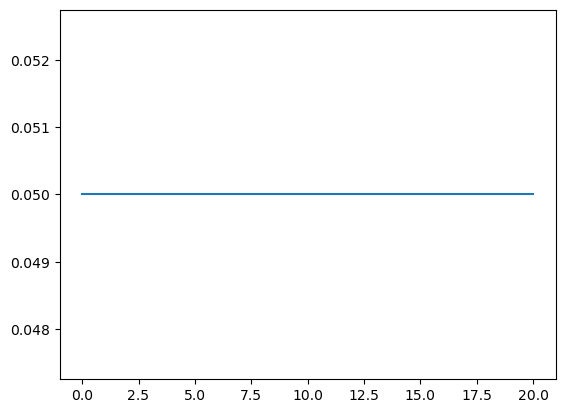

In [42]:
# 绘制均匀分布的概率密度函数
a = 0  # 定义均匀分布的下界
b = 20  # 定义均匀分布的上界
x = np.linspace(a,b , 200)  # 在[a,b]区间内生成200个等间距的点
y = [1/(b-a)] * 200  # 计算均匀分布的概率密度值(常数值1/(b-a))
plt.plot(x, y)  # 绘制均匀分布的概率密度函数图

# 打印均匀分布的期望值计算公式
print("E[x] = (a + b) / 2")

*For solutions, see `solutions/uniform.py`*

*有关解决方案，请参见 `solutions/uniform.py`*


### Computing Covariance

### 计算协方差

The Covariance between two variables, $X$ and $Y$, is denoted as $cov(X,Y)$ and can be computed using the Expected Values of $X$ and $Y$.

两个变量 $X$ 和 $Y$ 之间的协方差表示为 $cov(X,Y)$，并且可以使用 $X$ 和 $Y$ 的期望值来计算。

$cov(X,Y) = E[(X-E[X])(Y-E[Y])]$

This reduces to the form:

这简化为以下形式：

$cov(X,Y) = E[XY] - E[X]E[Y]$

(To do the reduction, note that $E[E[X]] = E[X]$)

In this form, it is easily computable. If you have sample data instead of the real underlying distribution, you can replace $E[X]$ with the value $\bar{X}$, $E[Y]$ with value $\bar{Y}$, and $E[XY]$ with the value $\bar{XY}$. This obtains an estimate for the covariance.

在这种形式下，它很容易计算。如果你有样本数据而不是真实的底层分布，你可以用 $\bar{X}$ 替换 $E[X]$，用 $\bar{Y}$ 替换 $E[Y]$，用 $\bar{XY}$ 替换 $E[XY]$。这样就可以得到协方差的估计值。


Using the NumPy library, we can compute (an estimate of) the covariance using the `np.cov` function:

使用 NumPy 库，我们可以通过 `np.cov` 函数计算（估计的）协方差：


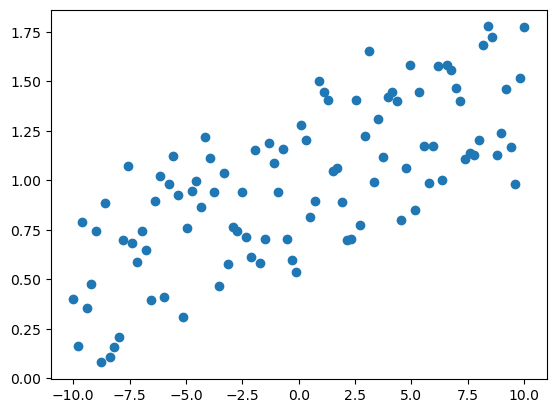

In [43]:
# 生成从-10到10的100个等间距数字作为X坐标
X = np.linspace(-10, 10, 100)
# 生成Y坐标:随机数加上从0到1的线性递增序列,使数据呈现上升趋势
Y = np.random.random(100) + np.linspace(0, 1, 100)
# 使用散点图绘制X和Y的关系
plt.plot(X, Y, 'o')

In [44]:
# 计算 X 和 Y 的协方差矩阵
C = np.cov(X, Y)
C

array([[34.35023637,  1.68651251],
       [ 1.68651251,  0.15731814]])

Wait, that's not one value! That is a covariance matrix, which includes the variance values on the diagonal. In this case, `C[0][0]` is the same as `np.var(X)`, because $cov(X, X) = var(X)$ (and similarly for $Y$):

等等，那不是一个值！那是一个协方差矩阵，它包含了对角线上的方差值。在这种情况下，`C[0][0]` 与 `np.var(X)` 相同，因为 $cov(X, X) = var(X)$（对于 $Y$ 也是如此）：


In [45]:
# 分别计算 X 和 Y 的方差

np.var(X), np.var(Y)

(34.00673400673401, 0.15574495586934003)

Further, we can see from the results that $cov(X,Y) = cov(Y, X)$. You can confirm this by swapping $X$ and $Y$ in the covariance equation above.

此外，我们可以从结果中看出 $cov(X,Y) = cov(Y, X)$。你可以通过在上面的协方差方程中交换 $X$ 和 $Y$ 来确认这一点。


#### Exercise

#### 练习

1. Create two sets of numbers that have a *negative correlation*

1. 创建两组具有*负相关*的数字
2. Create two sets of numbers that have approximately a *zero correlation*

2. 创建两组具有近似*零相关性*的数字


In [46]:
# (1)
# 生成100个随机数作为x值
x = np.random.random(100)
# y值为1减去x，创建完全负相关的数据
y = 1 - x
# 计算x和y之间的皮尔逊相关系数和p值
correlation, p_value = stats.pearsonr(x, y)
print(correlation)

# (2)
# 生成100个随机x值
x = np.random.random(100) #+ np.linspace(0, 1, 100)
# 生成100个随机y值，与x值完全无关
y = np.random.random(100)

# 计算两组随机数之间的皮尔逊相关系数和p值
correlation, p_value = stats.pearsonr(x, y)
print(correlation)

-0.9999999999999998
-0.08384495435982713


*For solutions, see `solutions/correlations.py`*

*有关解决方案，请参见 `solutions/correlations.py`*


### Dimensionality Analysis

### 维度分析

In data, numbers are rarely in isolation - they normally have units associated with them. For instance, here are a bunch of heights and weights of 30 people:

在数据中，数字很少是孤立的——它们通常与单位相关联。例如，以下是30个人的身高和体重：


In [47]:
# 创建一个包含30个人身高数据(单位:厘米)的NumPy数组
heights = np.array([178.64530591, 173.06618977, 155.22558268, 186.8983648 ,
       149.16650972, 164.3049925 , 156.8397536 , 166.07190208,
       174.11183283, 155.54411733, 152.61490567, 182.89611452,
       145.79498225, 169.50606044, 157.94949789, 170.43628341,
       175.95694371, 178.09153374, 178.51960883, 173.56347301,
       158.79606688, 168.593175  , 159.88907252, 174.0085056 ,
       172.05981633, 175.79140631, 165.6368616 , 191.2270476 ,
       179.92045118, 153.1153195 ])

In [48]:
# 创建一个包含30个人体重数据(单位:kg)的NumPy数组
weights = np.array([ 88.39616195,  63.77670541,  82.1551606 , 102.81391498,
        54.11862754,  73.19813772,  87.89767135,  77.42374335,
        68.65163289,  81.00977302,  76.8384397 , 119.6155542 ,
        92.78823634,  73.24696289,  72.12448243,  87.41055872,
        88.22139197, 102.50923756,  83.48268745,  82.69144239,
        72.76970268,  96.6186149 ,  81.97160878,  85.20213248,
        95.62580765,  91.80510994,  67.09249674,  86.42500849,
        83.76262709,  71.82791366])

The covariance of these is strong (taller people tend to weigh more):

这些变量的协方差很强（较高的人往往体重更重）：


In [49]:
# 计算身高和体重的协方差 - 返回协方差矩阵中的[0,1]元素,表示两个变量之间的协方差值
np.cov(heights, weights)[0][1]

73.26405232380192

That's a positive value, and we could compare this against a similar covariance, *only if the units match*. That is, our heights are in centimetres, and our weights are in kilograms, so our covariance has a **unit of cmkg**. We can only compare other covariances with the same unit.

这是一个正值，我们可以将其与类似的协方差进行比较，*前提是单位匹配*。也就是说，我们的身高是以厘米为单位，体重是以千克为单位，因此我们的协方差具有**cmkg的单位**。我们只能比较具有相同单位的其他协方差。

Further, the unit cmkg has little meaning to most people and therefore the actual value of the covariance is hard to reason about. For contrast, take the standard deviation of the heights:

此外，单位 cmkg 对大多数人来说意义不大，因此协方差的实际值很难理解。相比之下，取高度的标准差：


In [50]:
# 计算身高数据的标准差（单位：厘米）
np.std(heights)  # Remembering that np.var(heights) will be in cm squared!

11.384729794575746

We can intuitively get an idea that lots of people will have heights "about 11cm from the mean", and one can easily picture that a good portion of the population lie within this 11cm radius around the mean, i.e. the boundary:

我们可以直观地了解到，很多人会拥有“距离平均值约11厘米”的身高，并且可以很容易地想象到，很大一部分人口的身高都落在这个以平均值为中心的11厘米范围内，即边界：


In [51]:
# 计算身高的均值减去标准差和均值加上标准差，这两个值构成了大约68%的数据分布区间
(np.mean(heights) - np.std(heights)), (np.mean(heights) + np.std(heights))

(156.75665944575758, 179.52611903490907)

However, we can not get a similar intuitive grasp on what it means to have a covariance of 73.2 cmkg, and it might actually be misleading to try and relate that to other known concepts.

然而，我们无法直观地理解协方差为73.2 cmkg意味着什么，试图将其与其他已知概念联系起来可能会产生误导。

It is for this reason that we usually use the correlation, which addresses this dimensionality problem. We will investigate the correlation in the next module.

正是出于这个原因，我们通常使用相关性来解决这个维度问题。我们将在下一个模块中探讨相关性。
